## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import probplot

## Loading the dataset

In [2]:
df = pd.read_excel('/kaggle/input/ds-dataset/DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Examining shape and structures of the dataset

In [3]:
df.shape

(414, 9)

In [4]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.rename({'House size (sqft)': 'Area (sqft)', 'House price of unit area': 'Price', 'House Age': 'Age'},axis=1,inplace=True)

In [7]:
df.describe()

,Transaction date,Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area (sqft),Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


## Exploratory Data Analysis

Skewness of Age: 0.38292623077299737
Kurtosis of Age: -0.8771201112290763


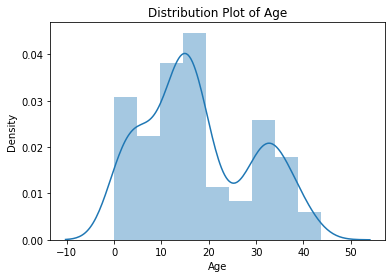

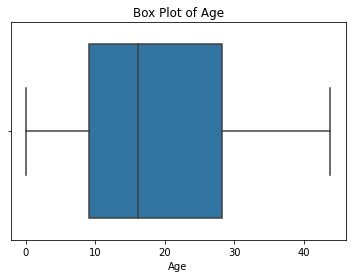

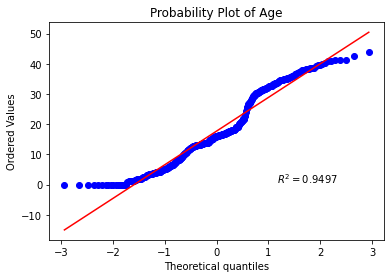

Skewness of Distance from nearest Metro station (km): 1.8887565801256048
Kurtosis of Distance from nearest Metro station (km): 3.20786836751181


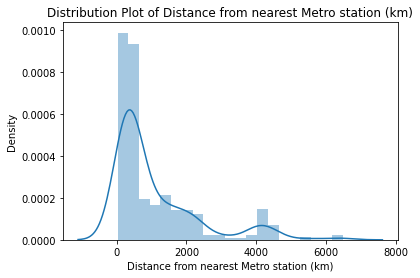

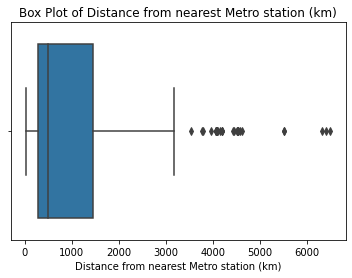

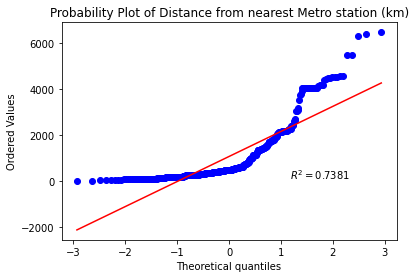

Skewness of Number of convenience stores: 0.15460656758377123
Kurtosis of Number of convenience stores: -1.0657514990134194


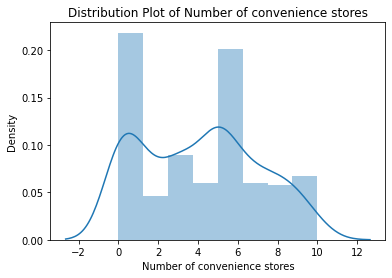

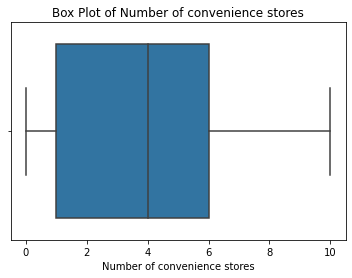

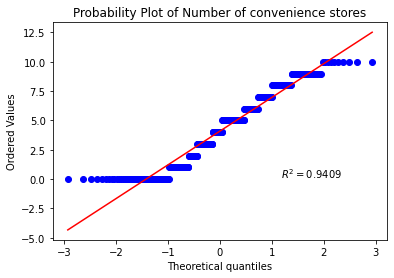

Skewness of latitude: -0.4385984450390504
Kurtosis of latitude: 0.26906977798608933


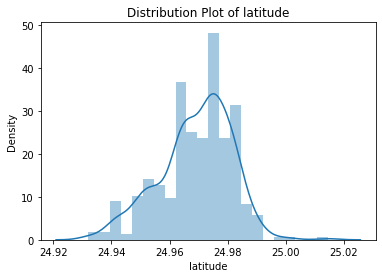

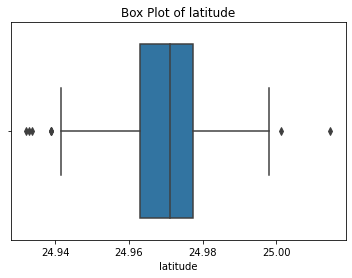

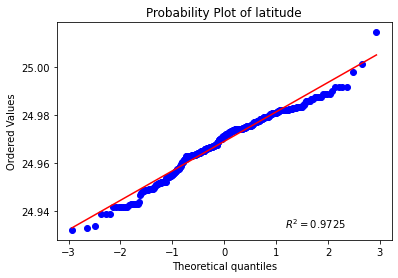

Skewness of longitude: -1.2195914979891498
Kurtosis of longitude: 1.2017924639738427


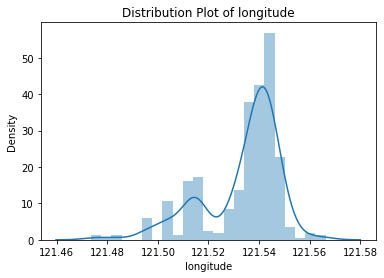

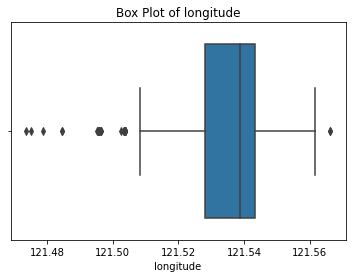

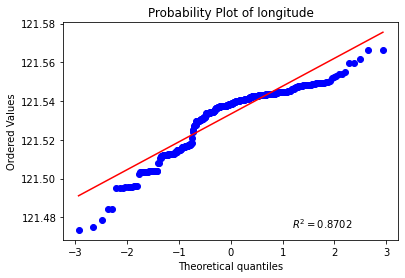

Skewness of Number of bedrooms: 0.022309017612164857
Kurtosis of Number of bedrooms: -1.5084574767476928


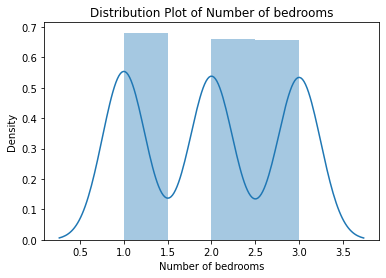

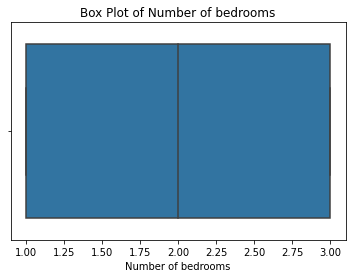

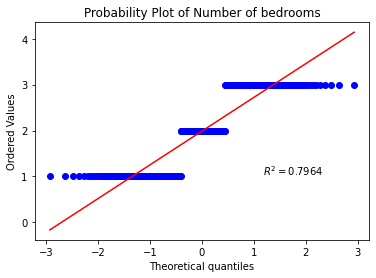

Skewness of Area (sqft): -0.11362728091036625
Kurtosis of Area (sqft): -1.4220194906438015


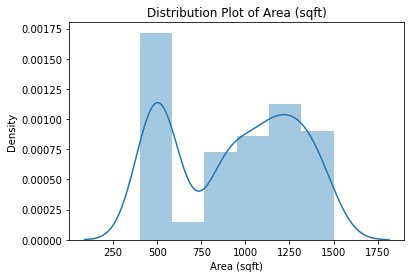

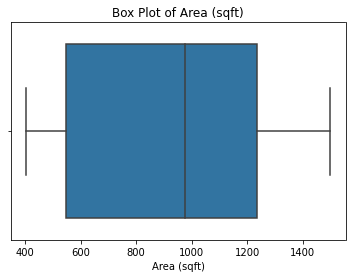

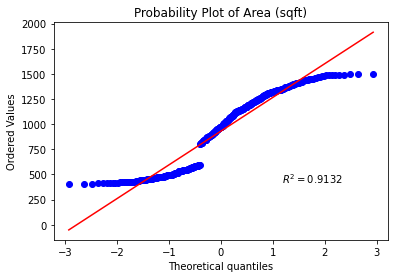

Skewness of Price: 0.5998525842660576
Kurtosis of Price: 2.1790970477396163


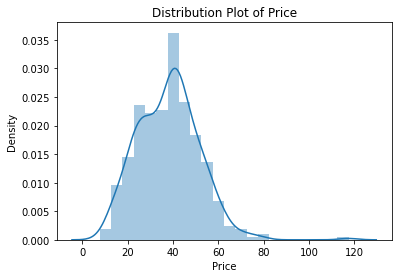

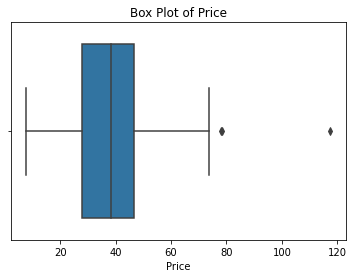

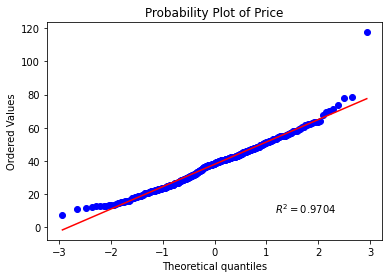

In [8]:
for col in df.columns:
    if col != 'Transaction date':
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())
        sns.distplot(df[col])
        plt.title(f'Distribution Plot of {col}')
        plt.show()
        sns.boxplot(df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()
        probplot(df[col],plot=plt,rvalue=True)
        plt.title(f'Probability Plot of {col}')
        plt.show();

The features which have a right skewed distribution are house age, distance from the nearest metro station and the target feature i.e. house price whereas those which have a left-skewed distribution are latitude and longitude.

In [9]:
df.corr()['Price'].sort_values(ascending=False)[1:]

Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
Area (sqft)                                 0.046489
Age                                        -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: Price, dtype: float64

The number of convenience stores, latitude and longitude are the features that have a significant positive correlation with the target house price feature. On the other hand, distance from the nearest metro station (in km) has a high negative correlation with house price.

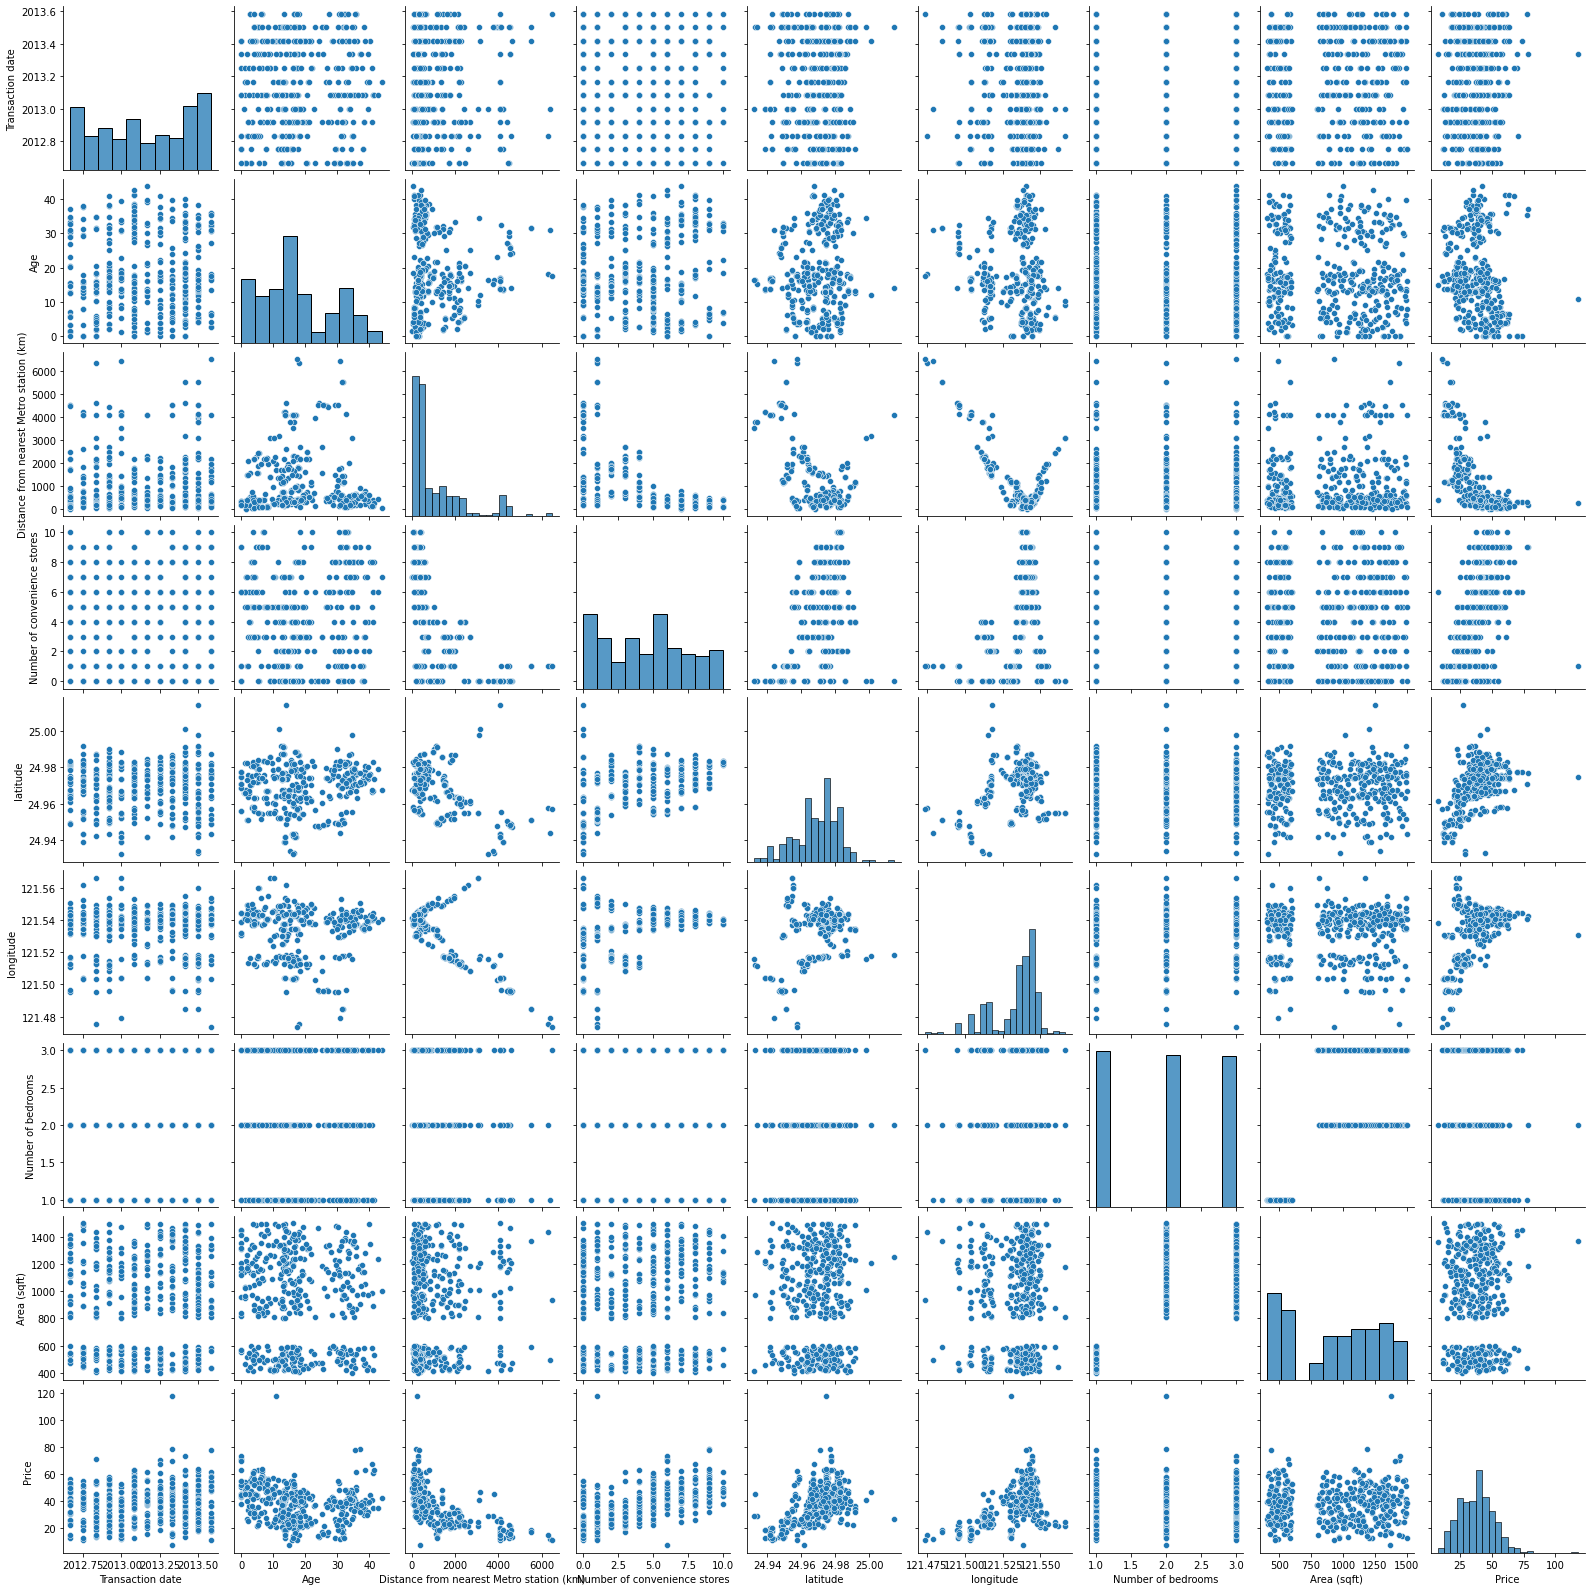

In [10]:
sns.pairplot(df,palette='viridis')

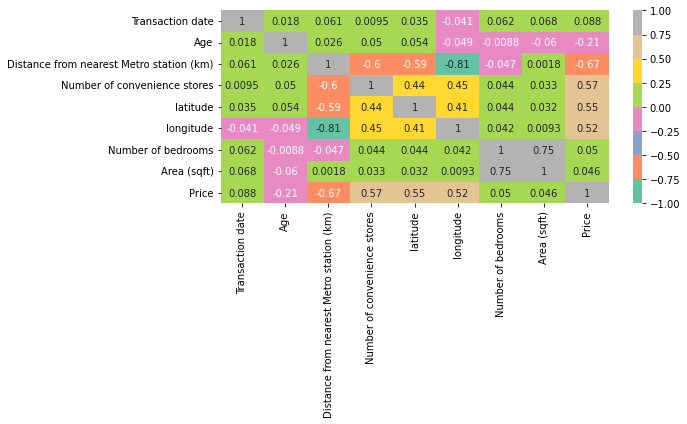

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Set2',vmin=-1,vmax=1)
plt.tight_layout();

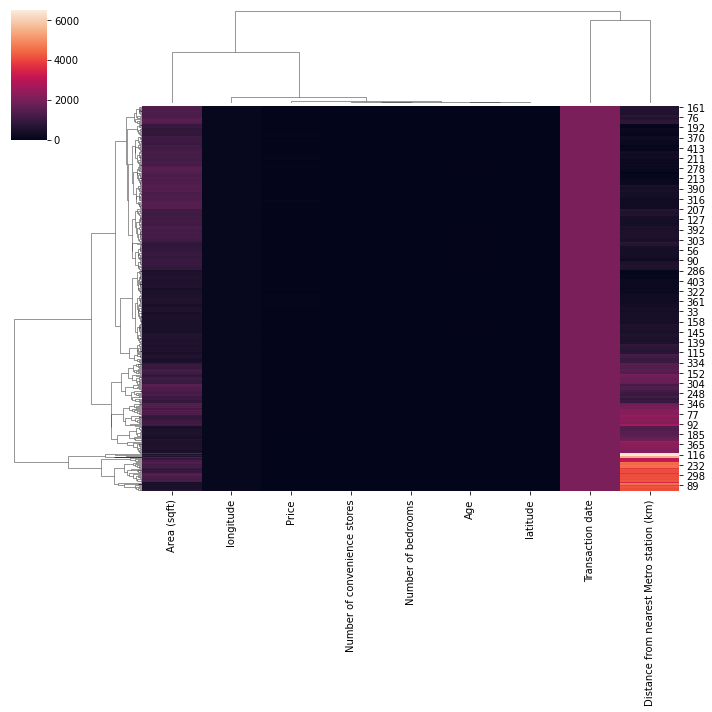

In [12]:
sns.clustermap(df)

In [13]:
# outlier_cols = ['Distance from nearest Metro station (km)']
# for col in outlier_cols:
#     lower_limit, upper_limit = df[col].quantile(0.25), df[col].quantile(0.75)
#     IQR = upper_limit - lower_limit
#     lower_whisker = lower_limit - 1.5 * IQR
#     upper_whisker = upper_limit + 1.5 * IQR
#     df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

## Creating a copy of the original dataframe

In [14]:
df_copy = df.copy()
df_copy.head()

,Transaction date,Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area (sqft),Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Feature Scaling using Standard Scaler

In [15]:
scaler = StandardScaler()
features = df_copy.columns
df_copy = scaler.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy,columns=features)
df_copy.head()

,Transaction date,Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area (sqft),Price
0,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-0.005901
1,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,0.310507
2,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.685782
3,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,1.237656
4,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,0.376732


## Splitting the dataset into training and test sets

In [16]:
X = df.drop('Price',axis=1)
y = df.Price

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

## Model Training & Evaluation

In [18]:
models = []
scores = []

In [19]:
def fit_and_test_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
    print("R2 Score:",r2_score(y_test,pred))
    models.append(str(model).split('(')[0])
    scores.append(r2_score(y_test,pred))

In [20]:
fit_and_test_model(LinearRegression())

RMSE: 6.86613453381572
R2 Score: 0.6438652713414743


In [21]:
fit_and_test_model(KNeighborsRegressor())

RMSE: 7.784480149631059
R2 Score: 0.5422283006670428


In [22]:
fit_and_test_model(SVR())

RMSE: 7.341659162224277
R2 Score: 0.5928277745006583


In [23]:
fit_and_test_model(GradientBoostingRegressor())

RMSE: 5.500784348534998
R2 Score: 0.77141962152418


In [24]:
fit_and_test_model(BaggingRegressor())

RMSE: 5.8651895792037285
R2 Score: 0.7401313936065343


In [25]:
fit_and_test_model(HistGradientBoostingRegressor())

RMSE: 5.653976288623789
R2 Score: 0.7585108212734839


In [26]:
fit_and_test_model(ExtraTreesRegressor())

RMSE: 5.198574633878017
R2 Score: 0.7958458204008692


In [27]:
fit_and_test_model(DecisionTreeRegressor())

RMSE: 7.688391249149591
R2 Score: 0.553459699478617


In [28]:
fit_and_test_model(RandomForestRegressor())

RMSE: 5.695300936034896
R2 Score: 0.7549678545760797


In [29]:
fit_and_test_model(XGBRegressor())

RMSE: 6.191189387715768
R2 Score: 0.7104404538026665


In [30]:
fit_and_test_model(CatBoostRegressor())

Learning rate set to 0.033651
0:	learn: 14.1241495	total: 56.4ms	remaining: 56.3s
1:	learn: 13.8764684	total: 57.3ms	remaining: 28.6s
2:	learn: 13.6288218	total: 58ms	remaining: 19.3s
3:	learn: 13.4105086	total: 58.8ms	remaining: 14.6s
4:	learn: 13.1913690	total: 59.5ms	remaining: 11.8s
5:	learn: 12.9857671	total: 60.3ms	remaining: 9.98s
6:	learn: 12.7650770	total: 60.9ms	remaining: 8.64s
7:	learn: 12.5703653	total: 61.6ms	remaining: 7.64s
8:	learn: 12.3914403	total: 62.2ms	remaining: 6.85s
9:	learn: 12.2113399	total: 62.9ms	remaining: 6.23s
10:	learn: 12.0259559	total: 63.6ms	remaining: 5.72s
11:	learn: 11.8589065	total: 64.2ms	remaining: 5.28s
12:	learn: 11.6886072	total: 64.7ms	remaining: 4.91s
13:	learn: 11.5213490	total: 65.3ms	remaining: 4.6s
14:	learn: 11.3660748	total: 65.9ms	remaining: 4.33s
15:	learn: 11.2065066	total: 66.5ms	remaining: 4.09s
16:	learn: 11.0536121	total: 67.1ms	remaining: 3.88s
17:	learn: 10.8965437	total: 67.7ms	remaining: 3.69s
18:	learn: 10.7392175	total: 

In [31]:
fit_and_test_model(MLPRegressor())

RMSE: 8.041120054370092
R2 Score: 0.5115469775526884


In [46]:
fit_and_test_model(LGBMRegressor())

RMSE: 5.784440062319054
R2 Score: 0.7472376645221062


## Performance Comparison of Baseline Models

In [47]:
model_performances = pd.DataFrame([models,scores]).T
model_performances.columns = ['Model','R2 Score']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score
Model,
<catboost.core.CatBoostRegressor object at 0x7f1ba0364a10>,0.813914
ExtraTreesRegressor,0.795846
GradientBoostingRegressor,0.77142
HistGradientBoostingRegressor,0.758511
RandomForestRegressor,0.754968
LGBMRegressor,0.747238
BaggingRegressor,0.740131
XGBRegressor,0.71044
LinearRegression,0.643865


Among the baseline models, Cat Boost Regressor is the best performing model with an excellent accuracy score of about 81.3%. 

## Model Optimization & Cross Validation using Hyperparameter Tuning

In [43]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
cat = CatBoostRegressor(silent=True)
xgb = XGBRegressor(eval_metric = 'logloss', use_label_encoder=False)
bag = BaggingRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
hist = HistGradientBoostingRegressor()
lgbm = LGBMRegressor()
#KNN
para_knn = {'n_neighbors':np.arange(1, 50),'metric': ['manhattan','euclidean','minkowski','chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform','distance']}  
grid_knn = GridSearchCV(knn, param_grid=para_knn) 

#Decision Tree
para_dt = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt)

#Random Forest
params_rf = {'n_estimators':[100,200, 350,500], 'min_samples_leaf':[2, 10, 30], 'bootstrap': [True,False]}
grid_rf = GridSearchCV(rf, param_grid=params_rf)

#Histogram Gradient Boosting 
params_hist = {'loss': ['squared_error', 'absolute_error', 'poisson'], 'learning_rate': [0.2,0.5,0.8,1]}
grid_hist = GridSearchCV(hist, params_hist)

#Light GBM
params_lgbm = {'n_estimators': [100,300,600,900], 'learning_rate': [0.2,0.5,0.8,1]}
grid_lgbm = GridSearchCV(lgbm, params_lgbm)

#CatBoost
params_cat = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_cat =  GridSearchCV(cat, params_cat)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_xgb =  GridSearchCV(xgb, params_xgb)

#Bagging 
params_bag = {'n_estimators':[100,350,500,750]}
grid_bag = GridSearchCV(bag, params_bag)

#Extra Trees
params_et = {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
grid_et = GridSearchCV(et, params_et)

#Gradient Boosting
params_gb = {'n_estimators': np.arange(100,900,200), 'learning_rate': np.linspace(0,1,5), 'max_features': ['sqrt','log2'], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
grid_gb = GridSearchCV(gb, params_gb)

In [34]:
grid_knn.fit(X_train,y_train)
pred = grid_knn.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 7.491291685090836
R2 Score: 0.576061241625119


In [35]:
grid_dt.fit(X_train,y_train)
pred = grid_dt.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 6.922239137662741
R2 Score: 0.6380213918245523


In [36]:
grid_rf.fit(X_train,y_train)
pred = grid_rf.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.7861497965426345
R2 Score: 0.7470882221290666


In [37]:
grid_xgb.fit(X_train,y_train)
pred = grid_xgb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.992373395929258
R2 Score: 0.728738946981732


In [38]:
grid_et.fit(X_train,y_train)
pred = grid_et.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 4.9295270011559
R2 Score: 0.8164306338170494


In [39]:
grid_cat.fit(X_train,y_train)
pred = grid_cat.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.2850056659347935
R2 Score: 0.7890008900443867


In [40]:
grid_bag.fit(X_train,y_train)
pred = grid_bag.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.773923346217891
R2 Score: 0.7481559256588999


In [41]:
grid_gb.fit(X_train,y_train)
pred = grid_gb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.277041388788909
R2 Score: 0.7896363441226677


In [44]:
grid_hist.fit(X_train,y_train)
pred = grid_hist.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.344353985027714
R2 Score: 0.7842354255971342


In [45]:
grid_lgbm.fit(X_train,y_train)
pred = grid_lgbm.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 6.055001192780785
R2 Score: 0.7230392829464825


Upon completion of hyperparameter tuning of baseline models, the model which exhibits the best performance is Extra Trees Regressor as its accuracy score increased significantly from just over 79.5% to nearly 81.4%.